In [1]:
import pandas as pd
import datetime
import numpy as np

In [2]:
df_begin=pd.read_csv('D:\\KULIAH\\teep\AI\\dataset\\52 cells\\CellReports.csv')
df_begin

,timestamp,Viavi.Cell.Name,DRB.UEThpDl,DRB.UEThpUl,RRU.PrbUsedDl,RRU.PrbUsedUl,RRU.PrbAvailDl,RRU.PrbAvailUl,RRU.PrbTotUl,RRU.PrbTotDl,RRU.MaxLayerDlMimo,CARR.AverageLayersDl,RRC.ConnMean,RRC.ConnMax,QosFlow.TotPdcpPduVolumeUl,QosFlow.TotPdcpPduVolumeDl,PEE.AvgPower,PEE.Energy
0,1672502400,S1/B2/C1,0.278192,0.278192,81.459016,81.459016,100,100,81.459016,81.459016,0.0,0.0,1.786885,2.311475,277.868853,277.868853,281.947679,0.004195
1,1672502400,S7/B2/C1,0.146310,0.146310,50.000000,50.000000,100,100,50.000000,50.000000,0.0,0.0,0.516667,1.316667,146.050000,146.050000,180.817352,0.002292
2,1672502400,S8/B2/C1,0.220303,0.220303,64.300000,64.300000,100,100,64.300000,64.300000,0.0,0.0,1.450000,3.966667,220.083333,220.083333,230.893458,0.004631
3,1672502400,S9/B2/C1,0.186428,0.186428,80.900000,80.900000,100,100,80.900000,80.900000,0.0,0.0,1.916667,6.900000,186.083333,186.083333,279.584476,0.005326
4,1672502400,S1/B13/C1,0.000000,0.000000,0.000000,0.000000,75,75,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,18.250000,0.000360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524206,1673107140,S3/N77/C2,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,4.000000,0.000000,0.000000,21.000000,11.000064
524207,1673107140,S3/N77/C3,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,2.000000,0.000000,0.000000,21.000000,7.609575
524208,1673107140,S4/N77/C1,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,3.000000,0.000000,0.000000,21.000000,7.789410
524209,1673107140,S4/N77/C2,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,5.000000,0.000000,0.000000,21.000000,18.617635


In [3]:
df_1= df_begin.drop(columns=['RRU.PrbTotUl', 'RRU.PrbTotDl']).copy()
convert_time=pd.to_datetime(df_1['timestamp'], unit='s',origin='unix')
df_1.insert(df_1.columns.get_loc('timestamp') + 1, 'datetime_column', convert_time)
df_1.insert(df_1.columns.get_loc('datetime_column') + 1, 'second', df_1['datetime_column'].dt.second)
df_1.insert(df_1.columns.get_loc('datetime_column') + 2, 'minute', df_1['datetime_column'].dt.minute)
df_1.insert(df_1.columns.get_loc('datetime_column') + 3, 'hour', df_1['datetime_column'].dt.hour)
df_1.insert(df_1.columns.get_loc('datetime_column') + 4, 'day', df_1['datetime_column'].dt.day)
df_1.insert(df_1.columns.get_loc('datetime_column') + 5, 'month', df_1['datetime_column'].dt.month)

In [4]:
df_1

,timestamp,datetime_column,second,minute,hour,day,month,Viavi.Cell.Name,DRB.UEThpDl,DRB.UEThpUl,...,RRU.PrbAvailDl,RRU.PrbAvailUl,RRU.MaxLayerDlMimo,CARR.AverageLayersDl,RRC.ConnMean,RRC.ConnMax,QosFlow.TotPdcpPduVolumeUl,QosFlow.TotPdcpPduVolumeDl,PEE.AvgPower,PEE.Energy
0,1672502400,2022-12-31 16:00:00,0,0,16,31,12,S1/B2/C1,0.278192,0.278192,...,100,100,0.0,0.0,1.786885,2.311475,277.868853,277.868853,281.947679,0.004195
1,1672502400,2022-12-31 16:00:00,0,0,16,31,12,S7/B2/C1,0.146310,0.146310,...,100,100,0.0,0.0,0.516667,1.316667,146.050000,146.050000,180.817352,0.002292
2,1672502400,2022-12-31 16:00:00,0,0,16,31,12,S8/B2/C1,0.220303,0.220303,...,100,100,0.0,0.0,1.450000,3.966667,220.083333,220.083333,230.893458,0.004631
3,1672502400,2022-12-31 16:00:00,0,0,16,31,12,S9/B2/C1,0.186428,0.186428,...,100,100,0.0,0.0,1.916667,6.900000,186.083333,186.083333,279.584476,0.005326
4,1672502400,2022-12-31 16:00:00,0,0,16,31,12,S1/B13/C1,0.000000,0.000000,...,75,75,0.0,0.0,0.000000,0.000000,0.000000,0.000000,18.250000,0.000360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524206,1673107140,2023-01-07 15:59:00,0,59,15,7,1,S3/N77/C2,0.000000,0.000000,...,273,273,0.0,0.0,0.000000,4.000000,0.000000,0.000000,21.000000,11.000064
524207,1673107140,2023-01-07 15:59:00,0,59,15,7,1,S3/N77/C3,0.000000,0.000000,...,273,273,0.0,0.0,0.000000,2.000000,0.000000,0.000000,21.000000,7.609575
524208,1673107140,2023-01-07 15:59:00,0,59,15,7,1,S4/N77/C1,0.000000,0.000000,...,273,273,0.0,0.0,0.000000,3.000000,0.000000,0.000000,21.000000,7.789410
524209,1673107140,2023-01-07 15:59:00,0,59,15,7,1,S4/N77/C2,0.000000,0.000000,...,273,273,0.0,0.0,0.000000,5.000000,0.000000,0.000000,21.000000,18.617635


In [5]:
# Filter for specific columns and their correlations
corr_matrix = df_1.corr()[['RRU.PrbUsedDl', 'RRU.PrbUsedUl']]
display(corr_matrix)
filtered_corr = corr_matrix[['RRU.PrbUsedDl', 'RRU.PrbUsedUl']]

# Find columns where correlation with 'RRU.PrbUsedDl' or 'RRU.PrbUsedUl' is greater than 0
columns_with_high_corr = filtered_corr.index[(filtered_corr['RRU.PrbUsedDl'] > 0.) & (filtered_corr['RRU.PrbUsedUl'] > 0)].tolist()

print("higher correlation > 0:\n", columns_with_high_corr)

,RRU.PrbUsedDl,RRU.PrbUsedUl
timestamp,-0.000663,-0.000583
second,NaN,NaN
minute,0.000190,-0.000241
hour,0.000600,0.000520
day,0.000357,0.000006
month,0.000558,0.000206
DRB.UEThpDl,0.609351,0.655949
DRB.UEThpUl,0.551258,0.604384
RRU.PrbUsedDl,1.000000,0.976418
RRU.PrbUsedUl,0.976418,1.000000


higher correlation > 0:
 ['hour', 'day', 'month', 'DRB.UEThpDl', 'DRB.UEThpUl', 'RRU.PrbUsedDl', 'RRU.PrbUsedUl', 'RRU.PrbAvailDl', 'RRU.PrbAvailUl', 'RRU.MaxLayerDlMimo', 'CARR.AverageLayersDl', 'RRC.ConnMean', 'RRC.ConnMax', 'QosFlow.TotPdcpPduVolumeUl', 'QosFlow.TotPdcpPduVolumeDl', 'PEE.AvgPower', 'PEE.Energy']


In [6]:
seleted_columns = ['datetime_column', 'Viavi.Cell.Name'] + columns_with_high_corr
df_2= df_1[seleted_columns].copy()

In [7]:
#  Convert 'datetime_column' to datetime format if it's not already
df_2['datetime_column'] = pd.to_datetime(df_2['datetime_column'])

# Set 'datetime_column' as the index
df_2.set_index('datetime_column', inplace=True)

# Resample by minute and calculate the mean
try:
    df_3= df_2.resample('T').mean().drop(columns=['Viavi.Cell.Name'])
except:
    df_3= df_2.resample('T').mean()

df_3

,hour,day,month,DRB.UEThpDl,DRB.UEThpUl,RRU.PrbUsedDl,RRU.PrbUsedUl,RRU.PrbAvailDl,RRU.PrbAvailUl,RRU.MaxLayerDlMimo,CARR.AverageLayersDl,RRC.ConnMean,RRC.ConnMax,QosFlow.TotPdcpPduVolumeUl,QosFlow.TotPdcpPduVolumeDl,PEE.AvgPower,PEE.Energy
datetime_column,,,,,,,,,,,,,,,,,
2022-12-31 16:00:00,16.0,31.0,12.0,0.112853,0.109073,41.647609,40.984468,111.192308,111.192308,0.029167,0.029167,0.923145,1.974259,108.877027,112.657593,163.482931,0.002846
2022-12-31 16:01:00,16.0,31.0,12.0,0.100812,0.096750,42.121474,41.068910,111.192308,111.192308,0.042949,0.042949,0.923397,2.476603,96.565170,100.627194,153.417886,0.007884
2022-12-31 16:02:00,16.0,31.0,12.0,0.106379,0.102369,41.851282,40.958333,111.192308,111.192308,0.035256,0.035256,0.921795,2.682051,102.151550,106.161736,158.808699,0.012541
2022-12-31 16:03:00,16.0,31.0,12.0,0.100694,0.098010,42.577885,41.491026,111.192308,111.192308,0.041026,0.041026,0.922115,2.730769,97.808665,100.492253,157.386986,0.015050
2022-12-31 16:04:00,16.0,31.0,12.0,0.109902,0.107143,43.626603,42.665705,111.192308,111.192308,0.032051,0.032051,0.921795,2.759936,106.939023,109.697512,167.089184,0.017951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-07 15:55:00,15.0,7.0,1.0,0.110139,0.107350,42.102244,41.227244,111.192308,111.192308,0.028205,0.028205,0.922115,4.846154,107.129670,109.918532,164.456731,27.623363
2023-01-07 15:56:00,15.0,7.0,1.0,0.099864,0.098178,40.426282,39.726282,111.192308,111.192308,0.026603,0.026603,0.923077,4.846154,97.959150,99.644908,159.064446,27.626360
2023-01-07 15:57:00,15.0,7.0,1.0,0.114258,0.110941,40.190705,40.190705,111.192308,111.192308,0.023077,0.023077,0.923077,4.846154,110.729551,114.046510,161.020629,27.628952


In [9]:
df_final=df_3.astype(float).copy()
print(df_final.shape)

y_train=df_final[['RRU.PrbUsedDl', 'RRU.PrbUsedUl']].loc['2022-12-31':'2023-01-06']
x_train=df_final.loc['2022-12-31':'2023-01-06'].drop(columns=['RRU.PrbUsedDl', 'RRU.PrbUsedUl'])

y_validation=df_final[['RRU.PrbUsedDl', 'RRU.PrbUsedUl']].loc['2023-01-07':]
x_validation = df_final.loc['2023-01-07':].drop(columns=['RRU.PrbUsedDl', 'RRU.PrbUsedUl'])
print("shape y_train:", y_train.shape, "shape x_train:", x_train.shape, "shape y_validation:", y_validation.shape, "shape x_validation:", x_validation.shape)

(10080, 17)
shape y_train: (9120, 2) shape x_train: (9120, 15) shape y_validation: (960, 2) shape x_validation: (960, 15)


In [10]:
from sklearn.preprocessing import  StandardScaler
def scaler_data(data):
    scaler = StandardScaler()
    data_scaled= scaler.fit_transform(data)
    return data_scaled, scaler

In [11]:
x_train_scaled, x_train_scaler=scaler_data(x_train)
x_train_scaled= pd.DataFrame(x_train_scaled, columns=x_train.columns)
y_train_scaled, y_train_scaler=scaler_data(y_train)

x_validation_scaled, x_validation_scaler = scaler_data(x_validation)
x_validation_scaled = pd.DataFrame(x_validation_scaled, columns=x_validation.columns)
y_validation_scaled, y_validation_scaler = scaler_data(y_validation)

In [12]:
import xgboost as xgb
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.005, max_depth=10, n_jobs=-1)

# # Train the model
model.fit(x_train_scaled, y_train_scaled, 
          eval_set=[(x_train_scaled, y_train_scaled), (x_validation_scaled, y_validation_scaled)], 
          verbose=50)

# # Make predictions
train_preds = model.predict(x_train_scaled)
test_preds = model.predict(x_validation_scaled)

[0]	validation_0-rmse:0.99528	validation_1-rmse:0.99544
[50]	validation_0-rmse:0.78733	validation_1-rmse:0.79524
[100]	validation_0-rmse:0.62606	validation_1-rmse:0.64126
[150]	validation_0-rmse:0.50108	validation_1-rmse:0.52375
[200]	validation_0-rmse:0.40450	validation_1-rmse:0.43513
[250]	validation_0-rmse:0.33019	validation_1-rmse:0.36996
[300]	validation_0-rmse:0.27322	validation_1-rmse:0.32283
[350]	validation_0-rmse:0.22967	validation_1-rmse:0.28933
[400]	validation_0-rmse:0.19663	validation_1-rmse:0.26611
[450]	validation_0-rmse:0.17162	validation_1-rmse:0.24969
[500]	validation_0-rmse:0.15248	validation_1-rmse:0.23892
[550]	validation_0-rmse:0.13792	validation_1-rmse:0.23138
[600]	validation_0-rmse:0.12676	validation_1-rmse:0.22637
[650]	validation_0-rmse:0.11821	validation_1-rmse:0.22317
[700]	validation_0-rmse:0.11147	validation_1-rmse:0.22115
[750]	validation_0-rmse:0.10613	validation_1-rmse:0.21968
[800]	validation_0-rmse:0.10188	validation_1-rmse:0.21858
[850]	validation_

In [13]:
# Get the current date and time
now = datetime.datetime.now()

# Format the date and time to a string
timestamp = now.strftime("%Y%m%d_%H%M")
timestamp

model.save_model('xboost_%s.json'%timestamp)

In [14]:
print(timestamp)

20240708_1533


In [15]:
model_loaded = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.005, max_depth=10, n_jobs=-1)
model_loaded.load_model('xboost_%s.json'%timestamp)

In [17]:
train_preds_2 =   y_train_scaler.inverse_transform(train_preds)
test_preds_2  =   y_validation_scaler.inverse_transform(test_preds)

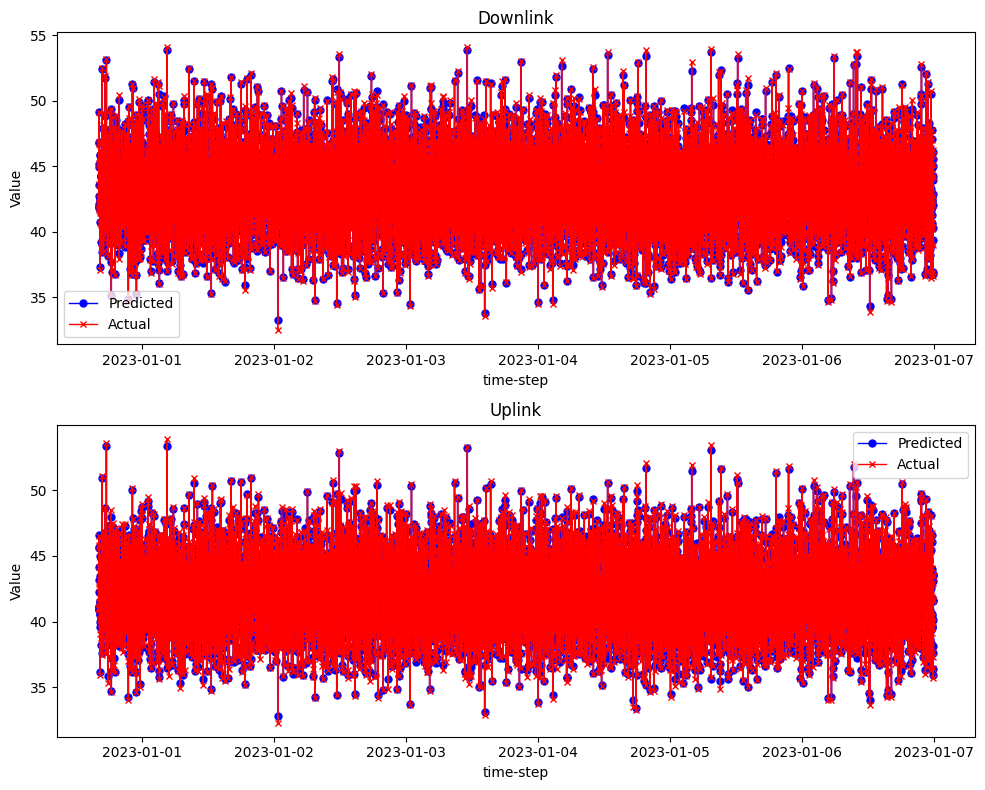

In [18]:
import matplotlib.pyplot as plt
timestep=x_train.index
# Assuming predictions and actual are numpy arrays of shape (900, 2)
feature_names = ['Downlink', 'Uplink']

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

for i in range(2):
    axs[i].plot(timestep, train_preds_2[:, i], label='Predicted', color='blue', marker='o', linestyle='-', markersize=5, linewidth=1)
    axs[i].plot(timestep, y_train.to_numpy()[:, i], label='Actual', color='red', marker='x', linestyle='-', markersize=5, linewidth=1)
    axs[i].set_title(feature_names[i])
    axs[i].set_xlabel('time-step')
    axs[i].set_ylabel('Value')
    axs[i].legend()

plt.tight_layout()
plt.show()

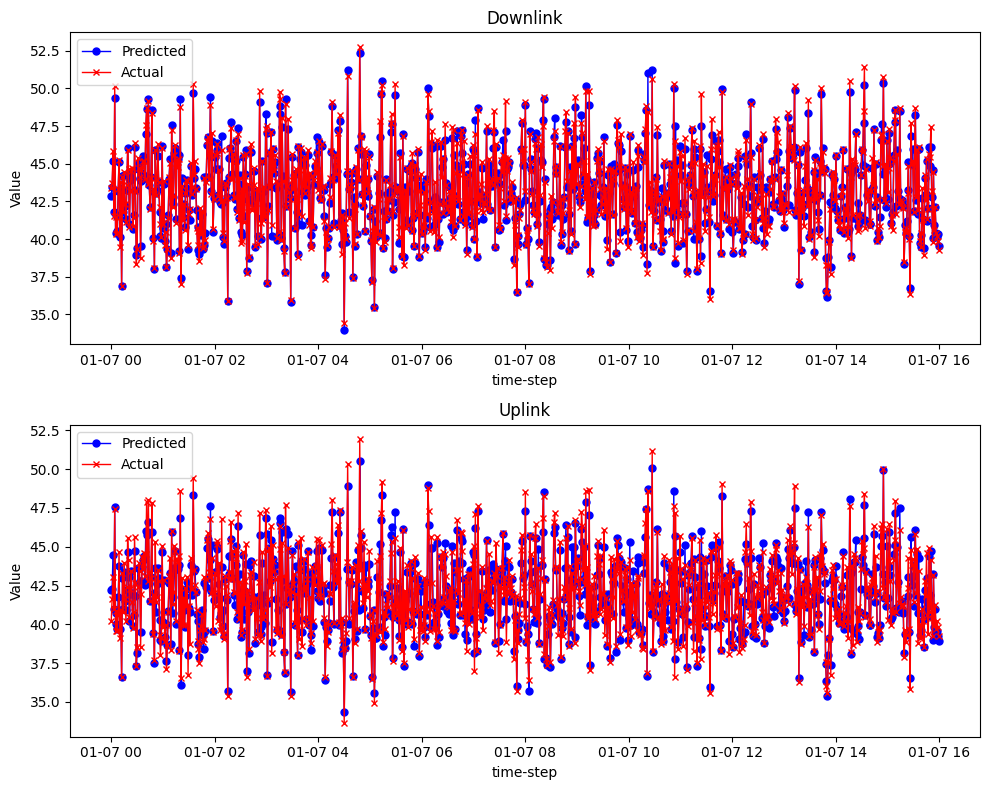

In [19]:
import matplotlib.pyplot as plt
timestep=x_validation.index
# Assuming predictions and actual are numpy arrays of shape (900, 2)
feature_names = ['Downlink', 'Uplink']

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

for i in range(2):
    axs[i].plot(timestep, test_preds_2[:, i], label='Predicted', color='blue', marker='o', linestyle='-', markersize=5, linewidth=1)
    axs[i].plot(timestep, y_validation.to_numpy()[:, i], label='Actual', color='red', marker='x', linestyle='-', markersize=5, linewidth=1)
    axs[i].set_title(feature_names[i])
    axs[i].set_xlabel('time-step')
    axs[i].set_ylabel('Value')
    axs[i].legend()

plt.tight_layout()
plt.show()

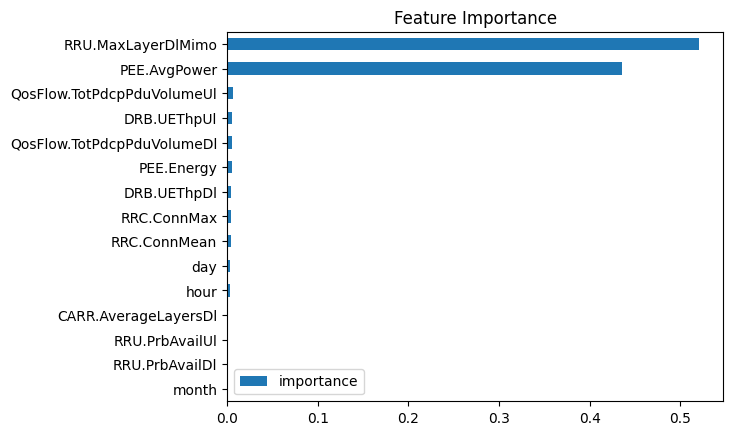

In [20]:
fi = pd.DataFrame(data=model.feature_importances_,
             index=model.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()